# Preprocess

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)
import scipy as sp

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.8


In [117]:
# Deng - GSE140811
# -me_wt
Deng_me_wt = sc.read('/cluster/groups/Wangxiaonan/share/yingjun/10X_Analysis/write/Deng_me_wt_full_processed.h5ad', cache=True)
# -me_apoe
Deng_me_apoe = sc.read('/cluster/groups/Wangxiaonan/share/yingjun/10X_Analysis/write/Deng_me_apoe_full_processed.h5ad', cache=True)
# -adv_wt
Deng_adv_wt = sc.read('/cluster/groups/Wangxiaonan/share/yingjun/10X_Analysis/write/Deng_adv_wt_full_processed.h5ad', cache=True)
# -adv_apoe
Deng_adv_apoe = sc.read('/cluster/groups/Wangxiaonan/share/yingjun/10X_Analysis/write/Deng_adv_apoe_full_processed.h5ad', cache=True)

In [122]:
Deng_me_wt = anndata.AnnData(X=sp.sparse.csr_matrix(Deng_me_wt.raw.X), obs=Deng_me_wt.obs, var=Deng_me_wt.raw.var, obsm=Deng_me_wt.obsm)
Deng_me_apoe = anndata.AnnData(X=sp.sparse.csr_matrix(Deng_me_apoe.raw.X), obs=Deng_me_apoe.obs, var=Deng_me_apoe.raw.var, obsm=Deng_me_apoe.obsm)
Deng_adv_wt = anndata.AnnData(X=sp.sparse.csr_matrix(Deng_adv_wt.raw.X), obs=Deng_adv_wt.obs, var=Deng_adv_wt.raw.var, obsm=Deng_adv_wt.obsm)
Deng_adv_apoe = anndata.AnnData(X=sp.sparse.csr_matrix(Deng_adv_apoe.raw.X), obs=Deng_adv_apoe.obs, var=Deng_adv_apoe.raw.var, obsm=Deng_adv_apoe.obsm)

In [443]:
adata = [Deng_me_wt,Deng_me_apoe,Deng_adv_wt,Deng_adv_apoe]

In [444]:
for i in range(len(adata)):
    print(adata[i].obs['Sample'][0])
    print(adata[i].shape)
    adata[i].var_names_make_unique()

Deng_me_wt
(3750, 17012)
Deng_me_apoe
(3006, 17151)
Deng_adv_wt
(2537, 18020)
Deng_adv_apoe
(4055, 18510)


# Doublet Removal

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 2.1%
Estimated detectable doublet fraction = 36.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.6%
Elapsed time: 2.8 seconds
3489
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.62
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 17.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.8%
Elapsed time: 2.2 seconds
2710
Preprocessing...


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.44
Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 54.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.3%
Elapsed time: 1.5 seconds
2468
Preprocessing...


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.41
Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 56.3%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.9%
Elapsed time: 2.6 seconds
3922


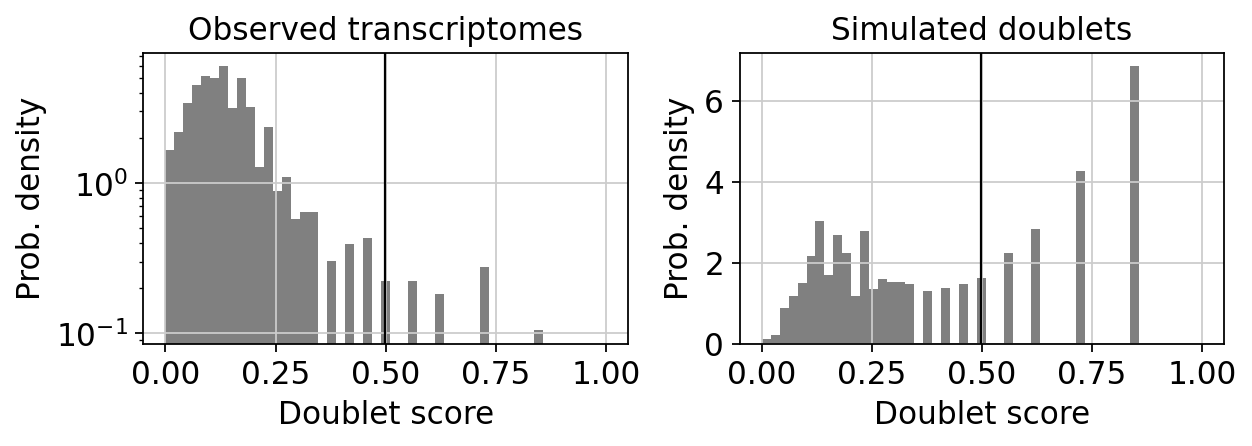

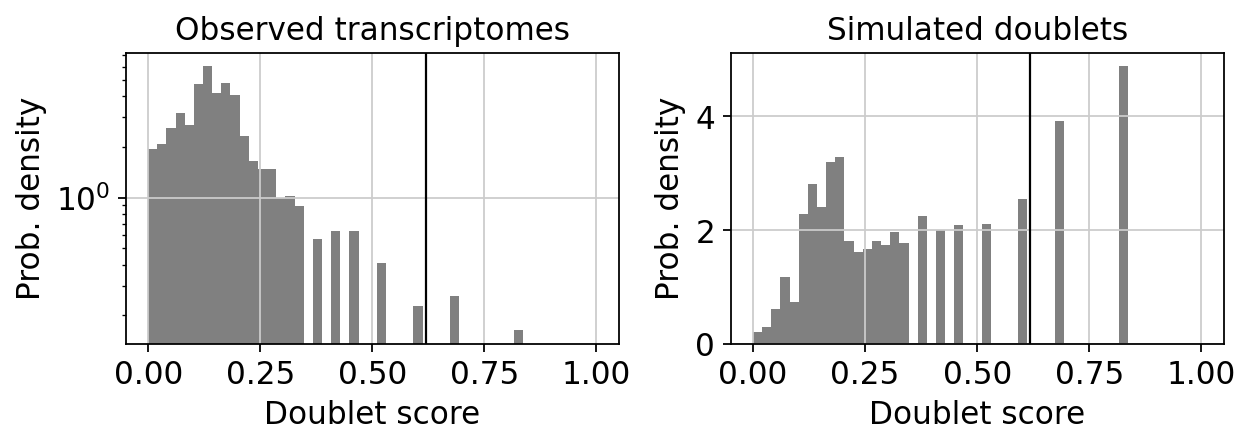

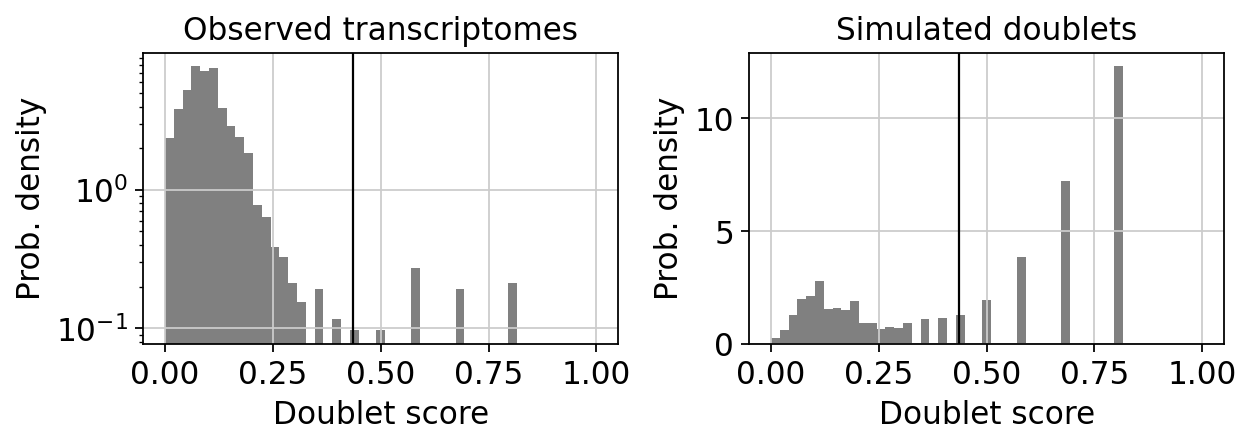

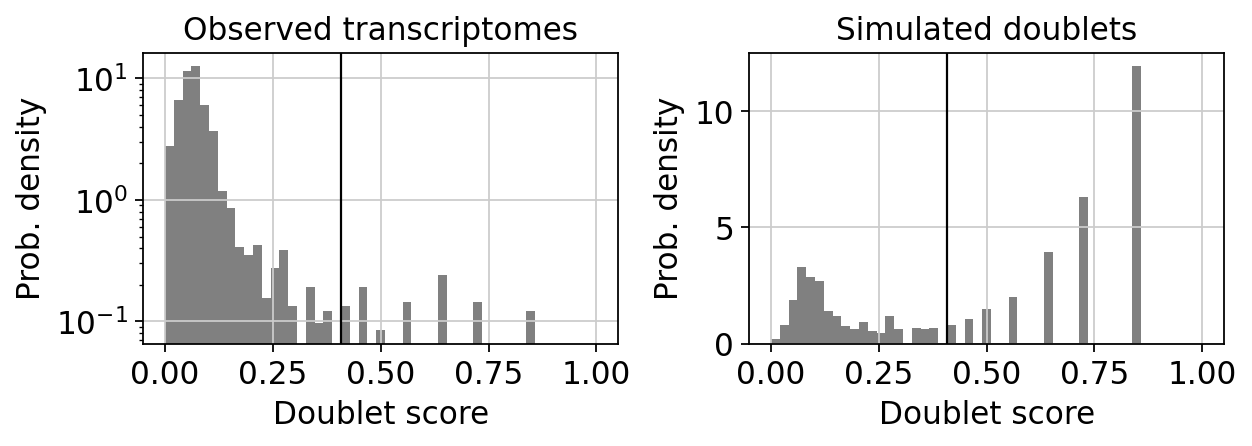

In [445]:
# Cutoff = 0.3

import scrublet as scr
for i in range(len(adata)):
    scrub = scr.Scrublet(adata[i].X)
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, min_cells=3, min_gene_variability_pctl=85, n_prin_comps=30)
    scrub.plot_histogram()
    adata[i].obs['doublet'] = predicted_doublets
    adata[i].obs['dbscore'] = doublet_scores
    #adata[i] = adata[i][~adata[i].obs.doublet]
    adata[i] = adata[i][adata[i].obs.dbscore<=0.3]
    print(adata[i].n_obs)

In [446]:
for i in range(len(adata)):
    print(adata[i].obs['Sample'][0])
    print(adata[i].shape)
    adata[i].var_names_make_unique()

Deng_me_wt
(3489, 17012)
Deng_me_apoe
(2710, 17151)
Deng_adv_wt
(2468, 18020)
Deng_adv_apoe
(3922, 18510)


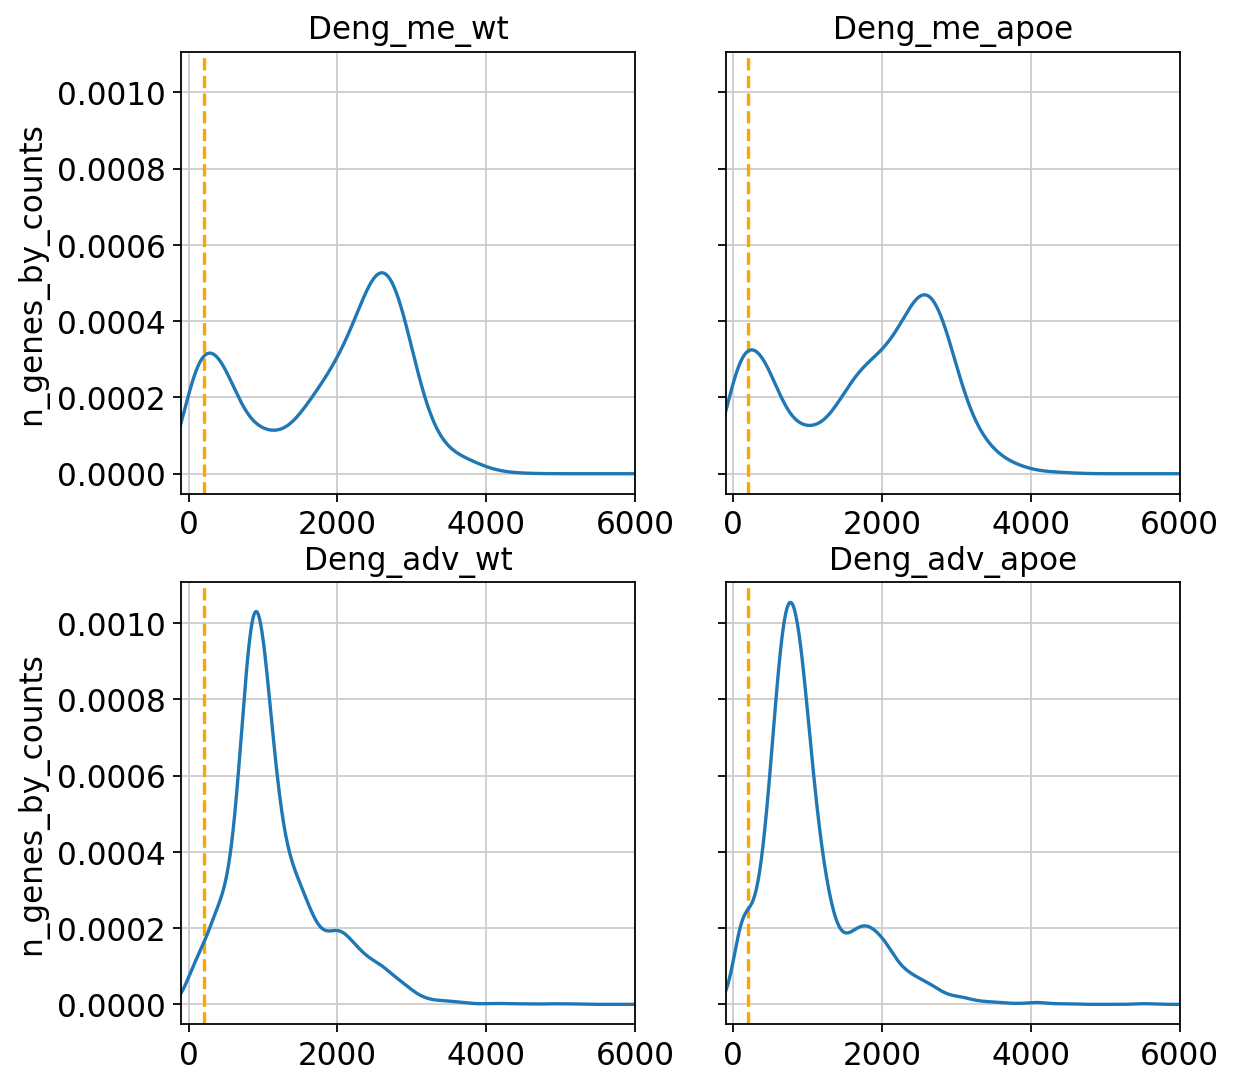

In [447]:
mincounts = 1000
mingenes = 200

ncol = len(adata)//2
nrow = 2
cutoff = mingenes
tocheck = 'n_genes_by_counts'
#tocheck = 'total_counts'

plot,ax = plt.subplots(ncol,nrow,figsize=(8,8),sharex=False,sharey=True)
for i in range(len(adata)):
    axtd = ax[i//ncol,i%nrow]
    axtd.set_title(adata[i].obs.Sample[0])
    axtd.set_xlim(-100,6000)
    axtd.axvline(cutoff,ls='--',color='orange')
    adata[i].obs[tocheck].plot.kde(ax=ax[i//ncol,i%nrow])
    axtd.set_ylabel(tocheck)
    
plt.savefig(f'./figures/Deng_{tocheck}_density.png',bbox_inches='tight')

In [448]:
for i in range(len(adata)):
    print('Total number of cells: {:d}'.format(adata[i].n_obs))

    sc.pp.filter_cells(adata[i], min_counts = mincounts)
    print('Number of cells after min count filter: {:d}'.format(adata[i].n_obs))

    sc.pp.filter_cells(adata[i], max_counts = 40000)
    print('Number of cells after max count filter: {:d}'.format(adata[i].n_obs))

    adata[i] = adata[i][adata[i].obs.pct_counts_MT < 20]
    print('Number of cells after MT filter: {:d}'.format(adata[i].n_obs))

    sc.pp.filter_cells(adata[i], min_genes = mingenes)
    print('Number of cells after gene filter: {:d}'.format(adata[i].n_obs))

Total number of cells: 3489
filtered out 526 cells that have less than 1000 counts
Number of cells after min count filter: 2963
Number of cells after max count filter: 2963
Number of cells after MT filter: 2688
Number of cells after gene filter: 2688
Total number of cells: 2710
filtered out 454 cells that have less than 1000 counts
Number of cells after min count filter: 2256

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number



Number of cells after max count filter: 2256
Number of cells after MT filter: 2073
Number of cells after gene filter: 2073
Total number of cells: 2468
filtered out 122 cells that have less than 1000 counts
Number of cells after min count filter: 2346
Number of cells after max count filter: 2346
Number of cells after MT filter: 2336
Number of cells after gene filter: 2336
Total number of cells: 3922
filtered out 307 cells that have less than 1000 counts
Number of cells after min count filter: 3615
Number of cells after max count filter: 3615
Number of cells after MT filter: 3598
Number of cells after gene filter: 3598


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [449]:
for i in range(len(adata)):
    print(adata[i].obs['Sample'][0])
    print(adata[i].shape)

Deng_me_wt
(2688, 17012)
Deng_me_apoe
(2073, 17151)
Deng_adv_wt
(2336, 18020)
Deng_adv_apoe
(3598, 18510)


In [ ]:
adata1 = anndata.AnnData.concatenate(*adata,join='outer')

In [ ]:
adata2 = anndata.AnnData.concatenate(*adata,join='inner')

In [488]:
adata1.shape

(10695, 20585)

In [489]:
adata2.shape

(10695, 14741)

In [459]:
sc.pp.filter_genes(adata1,min_cells=1)

filtered out 295 genes that are detected in less than 1 cells


In [454]:
adata2.write('./write/Deng_inner_240319.h5ad')

In [490]:
dfs = np.setdiff1d(adata1.var_names,adata2.var_names)

In [491]:
pd.DataFrame(dfs).to_csv('./Files/Dropout_genes_Deng.csv')

In [494]:
adata1.shape

(10695, 20585)

In [495]:
adata1.var.drop(columns = adata1.var.columns[adata1.var.columns.str.startswith('MT')],inplace=True)

In [496]:
adata1.write('./write/Deng_outer.h5ad')

In [497]:
adata = sc.read('./write/Deng_outer.h5ad')

In [498]:
adata.X

<10695x20585 sparse matrix of type '<class 'numpy.float32'>'
	with 17676096 stored elements in Compressed Sparse Row format>

# MAGIC Imputation

In [500]:
import magic
magic_op = magic.MAGIC()
adata_magic = magic_op.fit_transform(adata, genes=dfs)

Calculating MAGIC...
  Running MAGIC on 10695 cells and 20585 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 9.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 6.02 seconds.
    Calculating affinities...
    Calculated affinities in 5.84 seconds.
  Calculated graph and diffusion operator in 21.70 seconds.
  Calculating imputation...
  Calculated imputation in 5.50 seconds.
Calculated MAGIC in 30.63 seconds.


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/magic/utils.py:145: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  data = anndata.AnnData(data)


In [501]:
adata_magic

AnnData object with n_obs × n_vars = 10695 × 5844
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'phase', 'S_score', 'G2M_score', 'Age', 'Genotype', 'CellType', 'StudyID', 'Tissue', 'Sample', 'doublet', 'dbscore', 'n_genes', 'batch'
    var: 'gene_id-0', 'Exp-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'gene_id-1', 'Exp-1', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'gene_id-2', 'Exp-2', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'gene_id-3', 

In [503]:
adataIn = sc.read('./write/Deng_inner_240319.h5ad')

In [504]:
adataImputed = anndata.concat([adataIn,adata_magic],axis=1)

In [505]:
adataImputed.obs = adataIn.obs

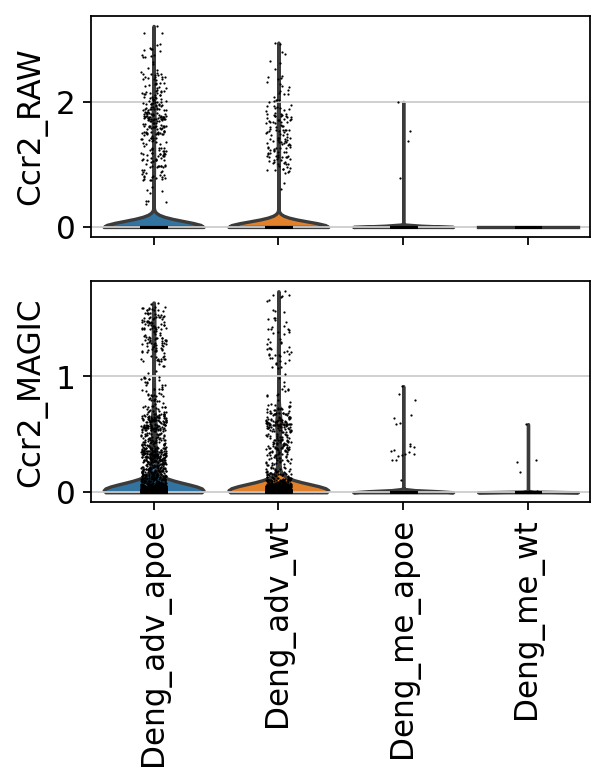

In [506]:
gl = 'Ccr2'

fig,ax = plt.subplots(2,1,sharex=True)

sc.pl.violin(adata,keys=gl,groupby='Sample',rotation=90,ax=ax[0],show=False,
             ylabel=f'{gl}_RAW')
sc.pl.violin(adata_magic,keys=gl,groupby='Sample',rotation=90,ax=ax[1],show=False,
             ylabel=f'{gl}_MAGIC')

plt.savefig(f'./figures/{gl}_MAGIC.png',bbox_inches='tight')

In [507]:
adataImputed.write('./write/Deng_outer_MAGIC.h5ad')

# PCA and UMAP

In [508]:
adata = sc.read('./write/Deng_outer_MAGIC.h5ad')

In [510]:
adata.raw = adata

In [511]:
# find highly variable genes
# parameters are mainly selected depends on user preference
sc.pp.highly_variable_genes(
    adata, min_mean=0.02, max_mean=3, min_disp=0.3, batch_key='Sample', inplace=True)

extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


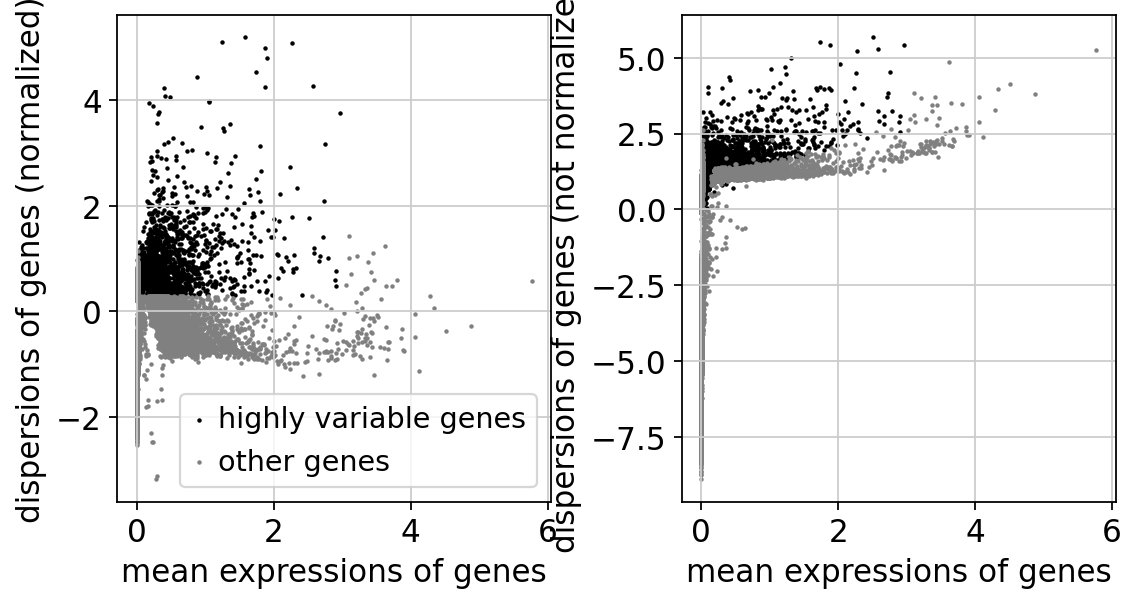

In [512]:
sc.pl.highly_variable_genes(adata)

In [513]:
print(np.sum(adata.var.highly_variable))

8846


In [514]:
adata = adata[:, adata.var.highly_variable].copy()

In [515]:
# scale for pca
sc.pp.scale(adata)
# pca
sc.tl.pca(adata, svd_solver='arpack')

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)


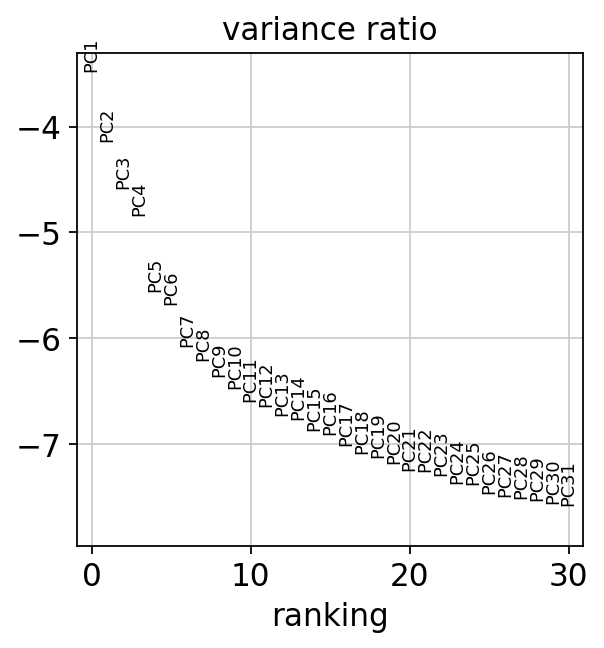

In [516]:
sc.pl.pca_variance_ratio(adata, log=True)

In [517]:
sc.external.pp.harmony_integrate(adata, key='Sample', adjusted_basis = 'X_pca_harmony_Sample_combined')

2024-03-19 16:15:48,427 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-03-19 16:15:56,845 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-03-19 16:15:57,027 - harmonypy - INFO - Iteration 1 of 10
2024-03-19 16:15:59,887 - harmonypy - INFO - Iteration 2 of 10
2024-03-19 16:16:02,570 - harmonypy - INFO - Converged after 2 iterations


In [518]:
sc.pp.neighbors(adata, use_rep = 'X_pca_harmony_Sample_combined')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [519]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


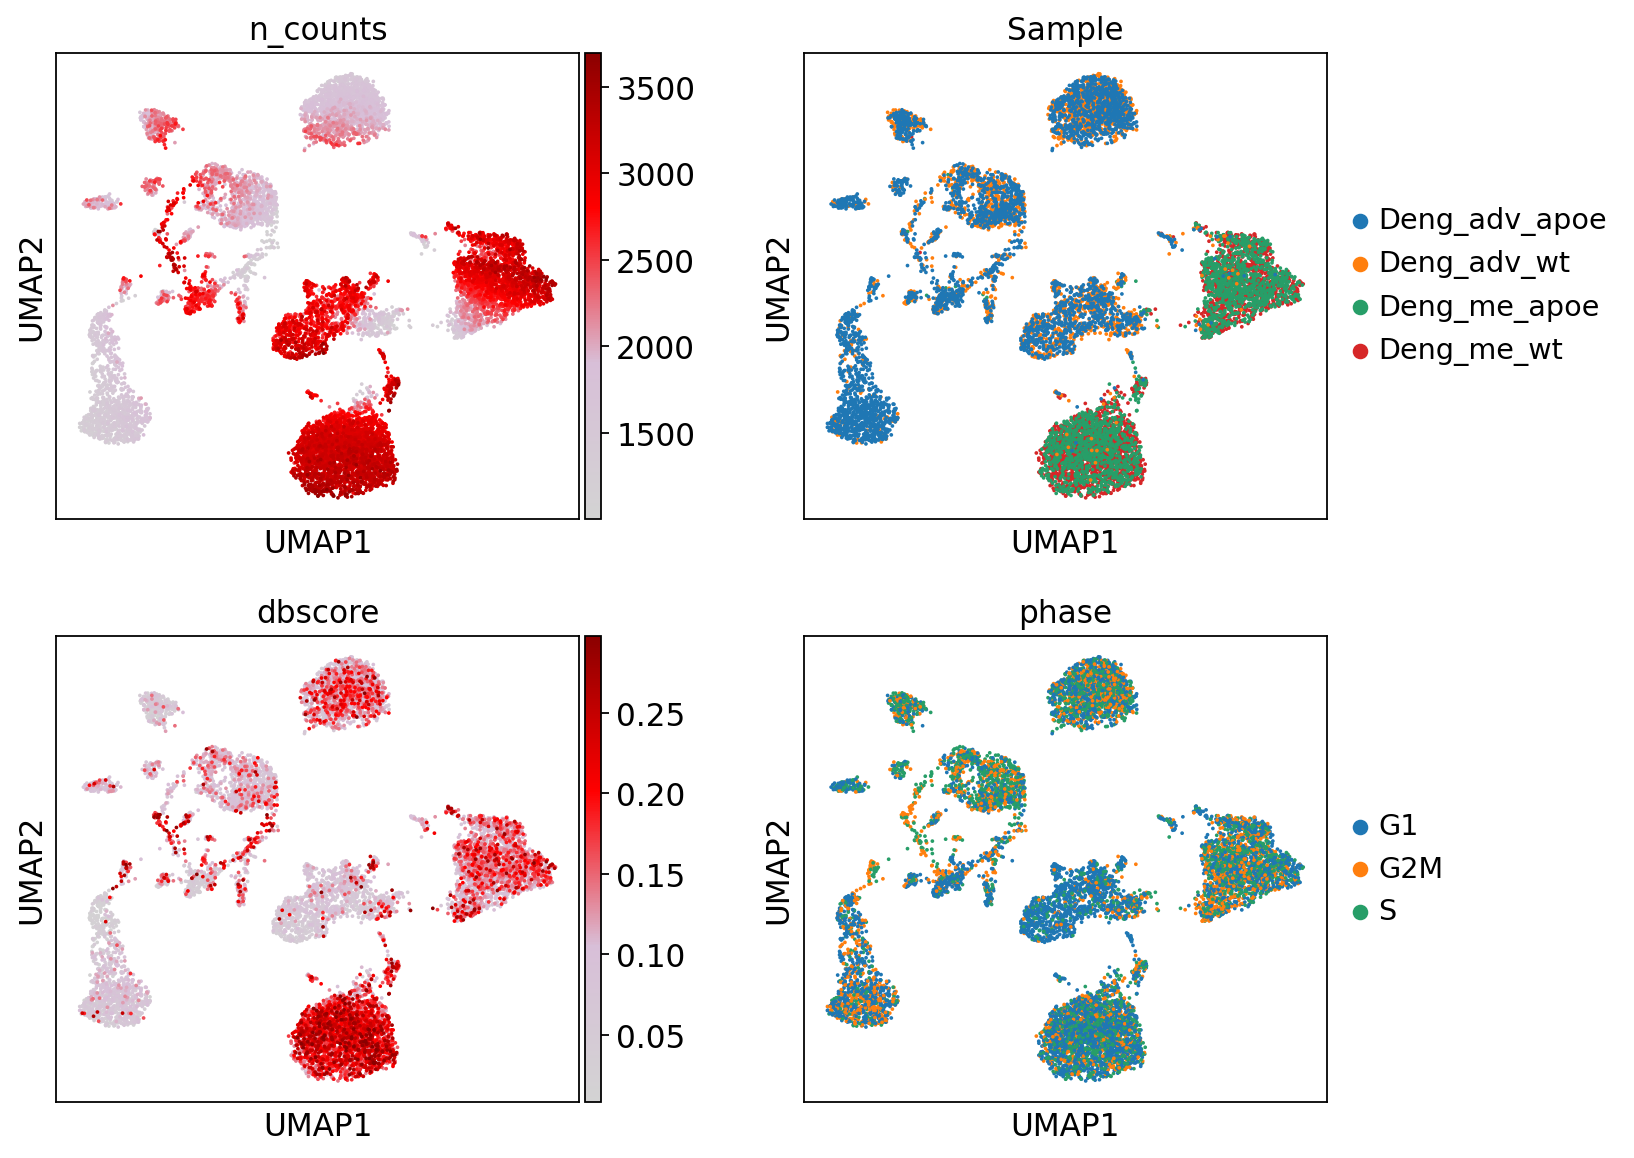

In [523]:
sc.pl.umap(adata, color= [ 'n_counts', 'Sample','dbscore', 'phase'], wspace=0.3,ncols=2,cmap=cmap,
          save='_Deng_processed.png')

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


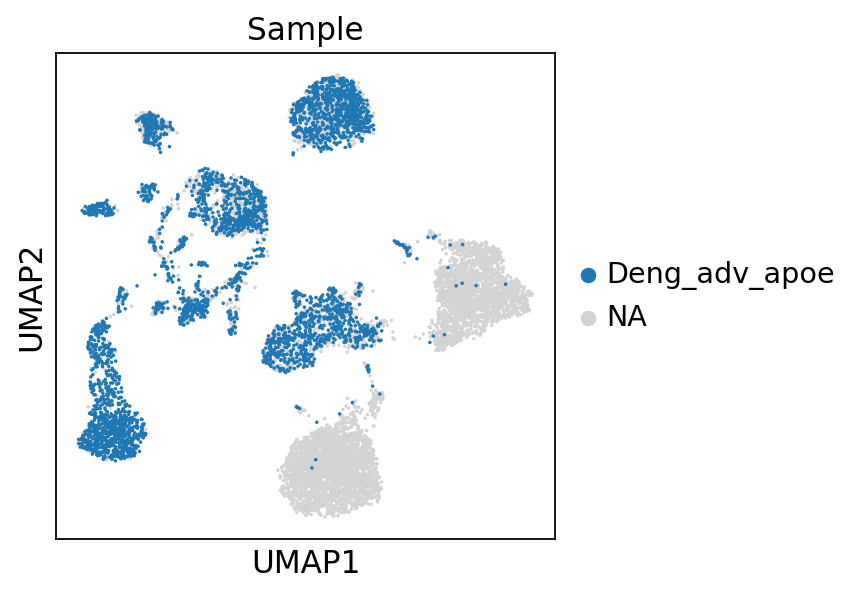

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


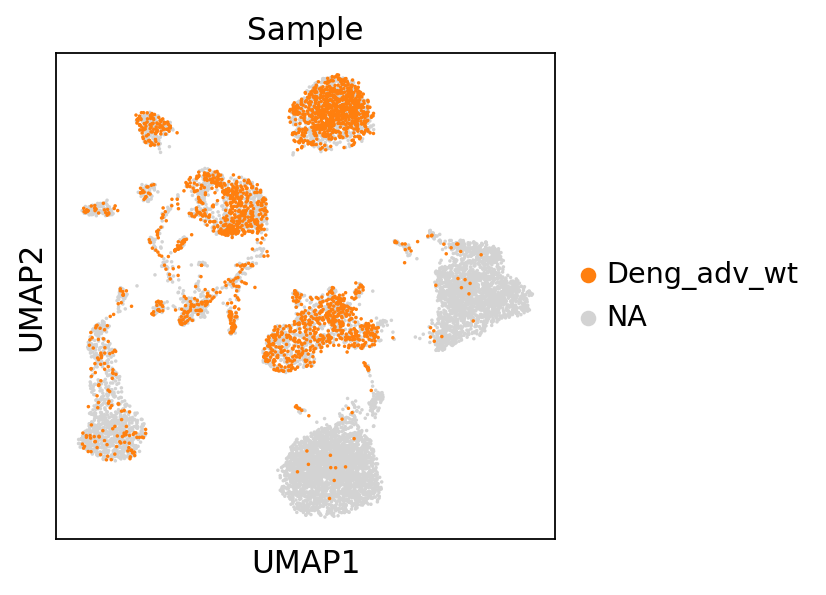

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


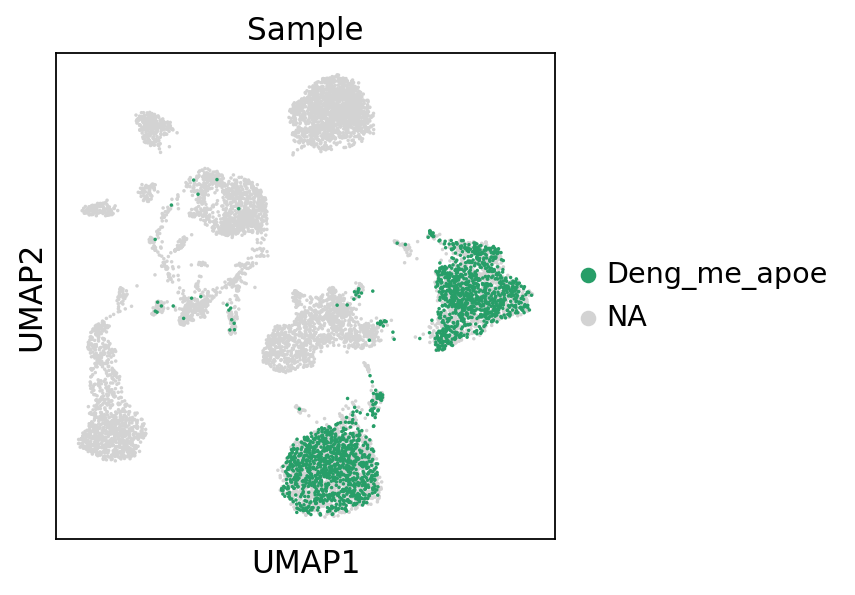

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


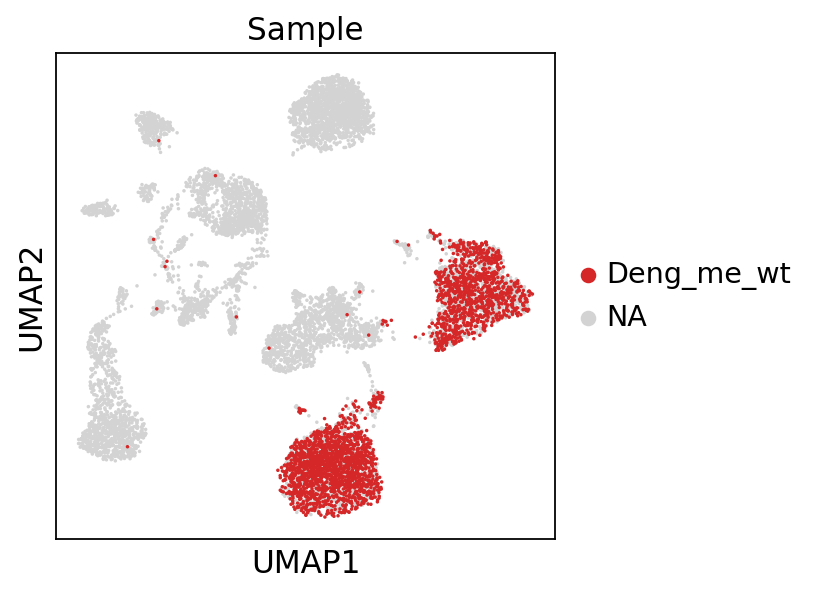

In [652]:
plt,ax = plt.subplots(2,2)
plt.figure()
ax =
for i in adata.obs.Sample.cat.categories:
    sc.pl.umap(#adata[adata.obs.Sample==i], 
               adata,
               color= ['Sample'], 
               groups=i,
               size=10,
               #wspace=0.3,
               #ncols=2,
               #cmap=cmap,
          #save=f'_{i}.png'
              )

In [521]:
adata.write('./write/Deng_outer_hvg.h5ad')

# Clustering & Annoation

In [524]:
adata = sc.read('./write/Deng_outer_hvg.h5ad')

In [530]:
sc.tl.leiden(adata, resolution=1,key_added='Leiden_v1')

running Leiden clustering
    finished: found 23 clusters and added
    'Leiden_v1', the cluster labels (adata.obs, categorical) (0:00:00)


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


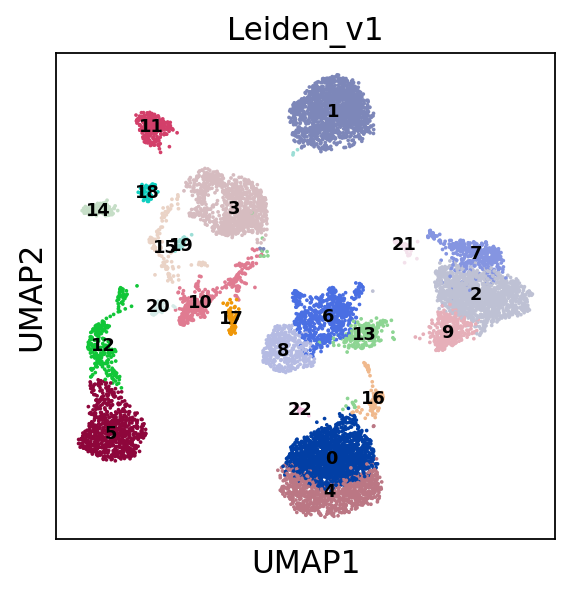

In [533]:
sc.pl.umap(adata, color='Leiden_v1', legend_loc='on data',legend_fontsize=8,
           save='_Deng_leiden_res1.0.png'
          )

In [534]:
ct_full = {
    'Endo': ['Fabp4', 'Pecam1'],
    'EndoI': ['Ly6a', 'Sox17'],
    'EndoII': ['Sema3g', 'Efnb2', 'Sox17', 'Hey1'],
    'EndoIII': ['Nr2f2', 'Vwf'],
    'SMC': ['Rgs5', 'Kcnj8', 'Cspg4', 'Pdgfrb'],
    'Schwann': ['Plp1'],
    'Gran': ['S100a8'],
    'MonoI': ['Plac8'],
    'MonoII': ['Saa3'],
    'Macro': ['C1qa', 'Cd68'],
    'DC': ['Cd74'],
    'NK': ['Ms4a4b'],
    'T': ['Cd3e', 'Cd3d', 'Lef1'],
    'CD8T': ['Cd8a'],
    'B':['Cd19','Cd79a'],
    'FibroI': ['Col1a1', 'Gsn', 'Dcn'],
    'FibroII': ['Wif1', 'Dkk3'],
    'FibroIII': ['Mt2', 'Timp1'],
    'MyoF': ['Acta2','Myh11','Tagln'],
    'Epi': ['Clu'],
    'CM': ['Actc1']
}

In [535]:
list(ct_full.values())

[['Fabp4', 'Pecam1'],
 ['Ly6a', 'Sox17'],
 ['Sema3g', 'Efnb2', 'Sox17', 'Hey1'],
 ['Nr2f2', 'Vwf'],
 ['Rgs5', 'Kcnj8', 'Cspg4', 'Pdgfrb'],
 ['Plp1'],
 ['S100a8'],
 ['Plac8'],
 ['Saa3'],
 ['C1qa', 'Cd68'],
 ['Cd74'],
 ['Ms4a4b'],
 ['Cd3e', 'Cd3d', 'Lef1'],
 ['Cd8a'],
 ['Cd19', 'Cd79a'],
 ['Col1a1', 'Gsn', 'Dcn'],
 ['Wif1', 'Dkk3'],
 ['Mt2', 'Timp1'],
 ['Acta2', 'Myh11', 'Tagln'],
 ['Clu'],
 ['Actc1']]

In [536]:
import itertools
GL = list(itertools.chain(*list(ct_full.values())))

categories: 0, 1, 2, etc.
var_group_labels: Endo, EndoI, EndoII, etc.


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


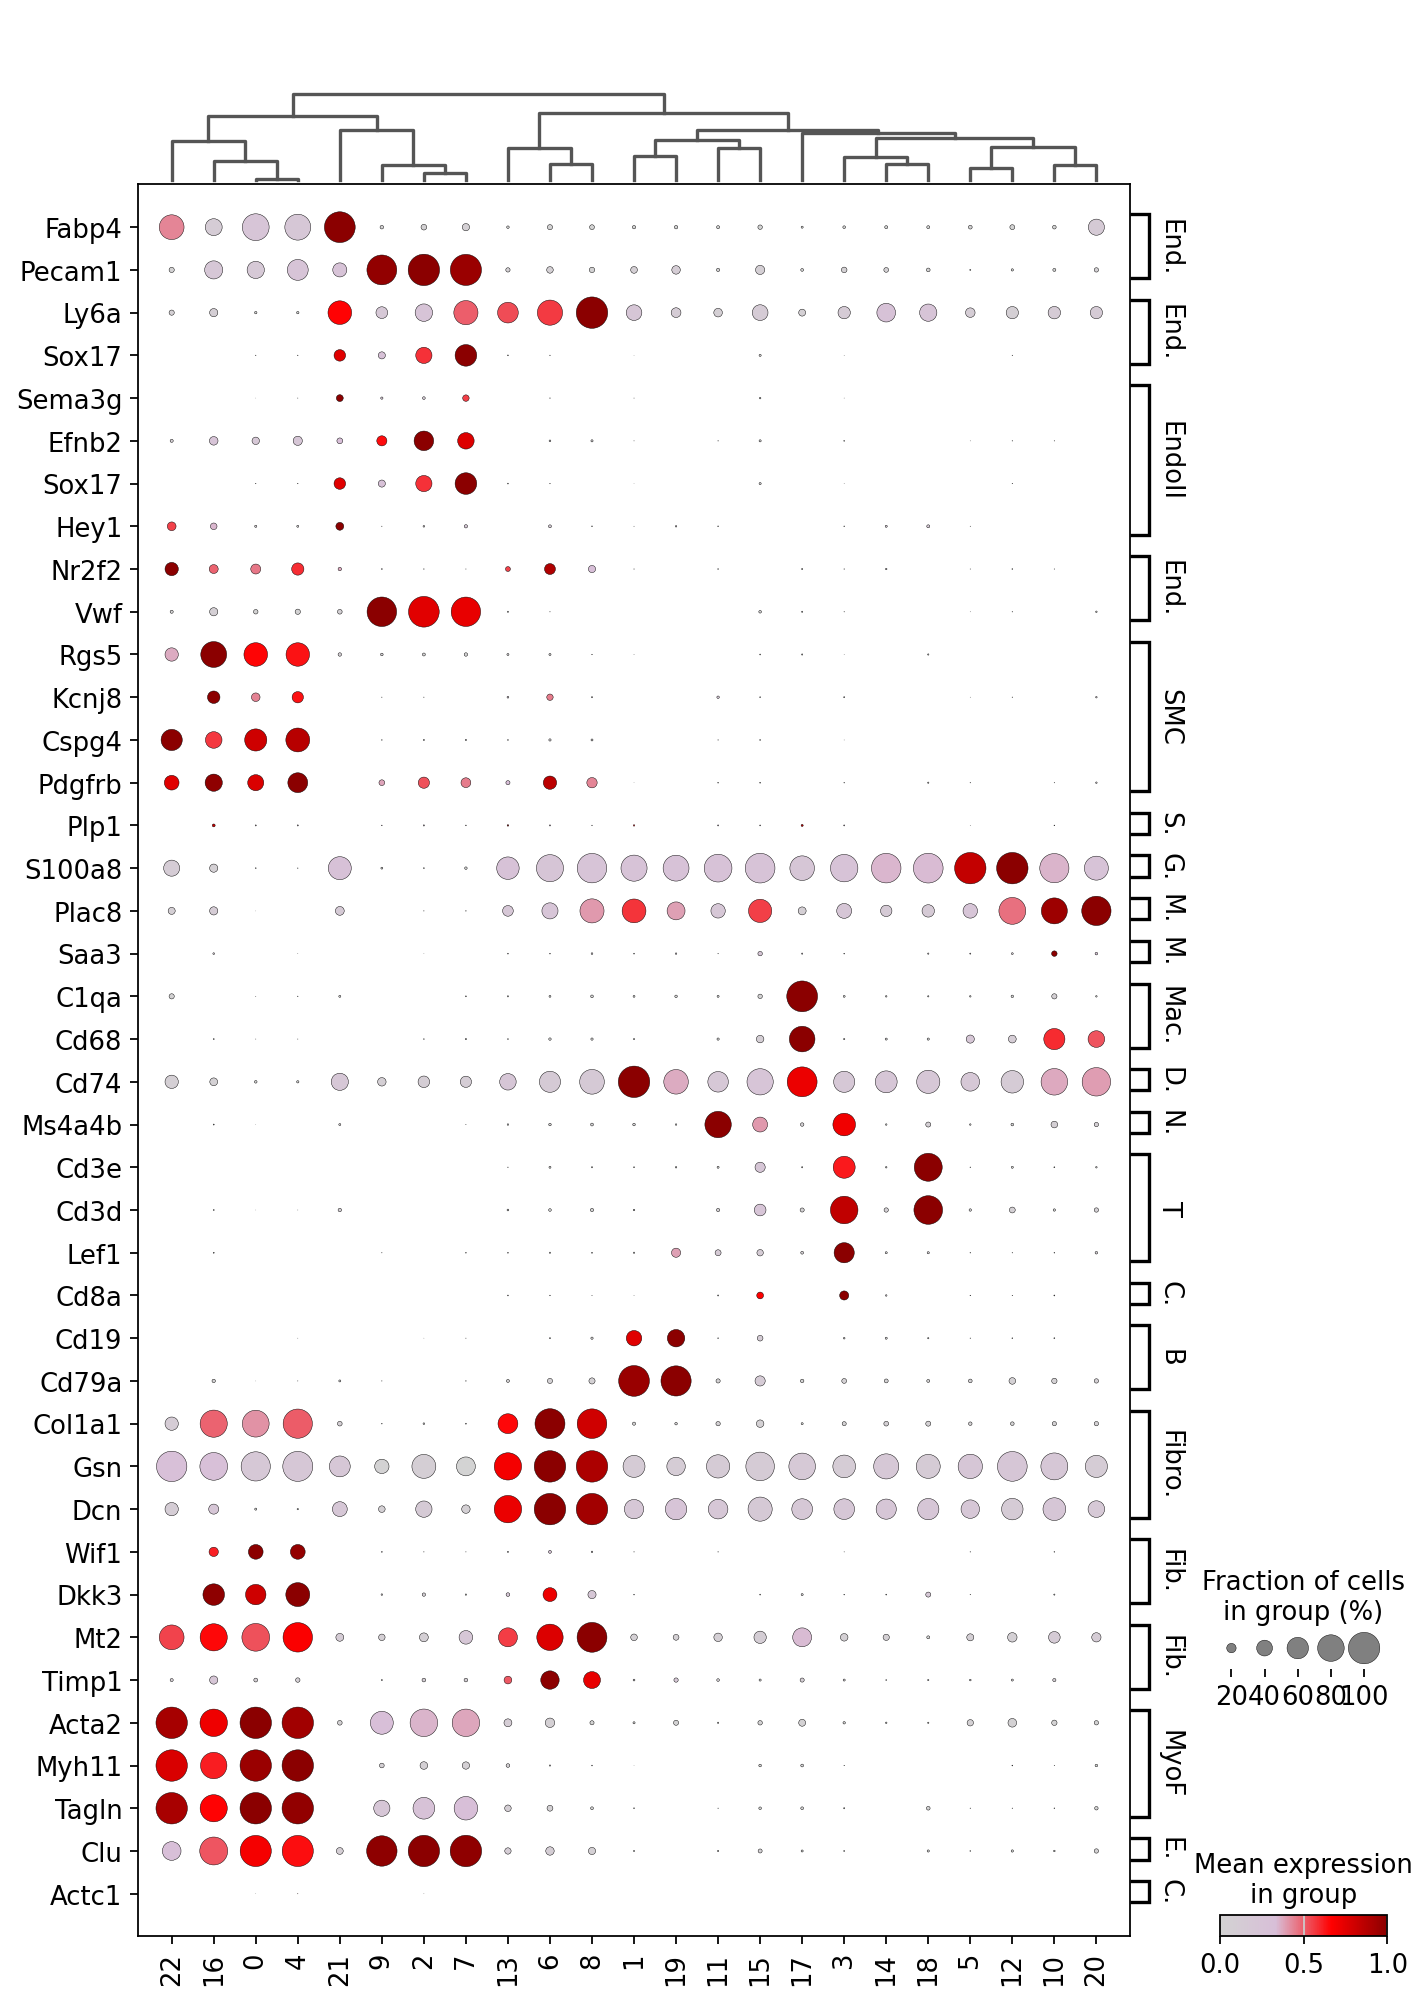

In [1104]:
sc.pl.dotplot(adata, groupby='Leiden_v1', var_names=ct_full, cmap=cmap, swap_axes=True, standard_scale='var',
              dendrogram=True,
             save='Deng_leidenv1.png'
             )

In [ ]:
tochange = {
    '0': 'SMC-1',
    '1': 'B cell-1',
    '2': 'Endo-1',
    '3': 'T cell-1',
    '4': 'SMC-2',
    '5': 'Gran-1',
    '6': 'Fibro-1',
    '7': 'Endo-2',
    '8': 'Fibro-2',
    '9': 'Endo-3',
    '10': 'Mono-1',
    '11': 'NK-1',
    '12': 'Gran-2',
    '13': 'Fibro-3',
    '14': 'T cell-2',
    '15': 'Mono-2',
    '16': 'SMC-3',
    '17': 'Macro-1',
    '18': 'T cell-3',
    '19': 'B cell-2',
    '20': 'Mono-3',
    '21': 'Endo-4',
    '22': 'SMC-4'
}

In [ ]:
adata.obs['CTv1'] = [tochange[x] for x in adata.obs.Leiden_v1]

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


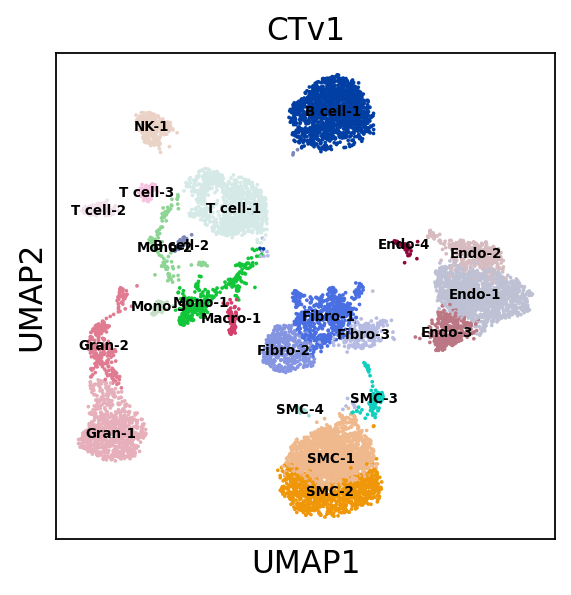

In [ ]:
sc.pl.umap(adata, color='CTv1', 
           legend_loc='on data',legend_fontsize=6,
           #save='_Deng_CTv1.png'
          )

In [ ]:
adata.write('./write/Deng_outer_processed.h5ad')

# Find marker genes

In [623]:
sc.tl.rank_genes_groups(adata,groupby='CTv1',key_added='DE_CTv1')

ranking genes
    finished: added to `.uns['DE_CTv1']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/tools/_rank_gene

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


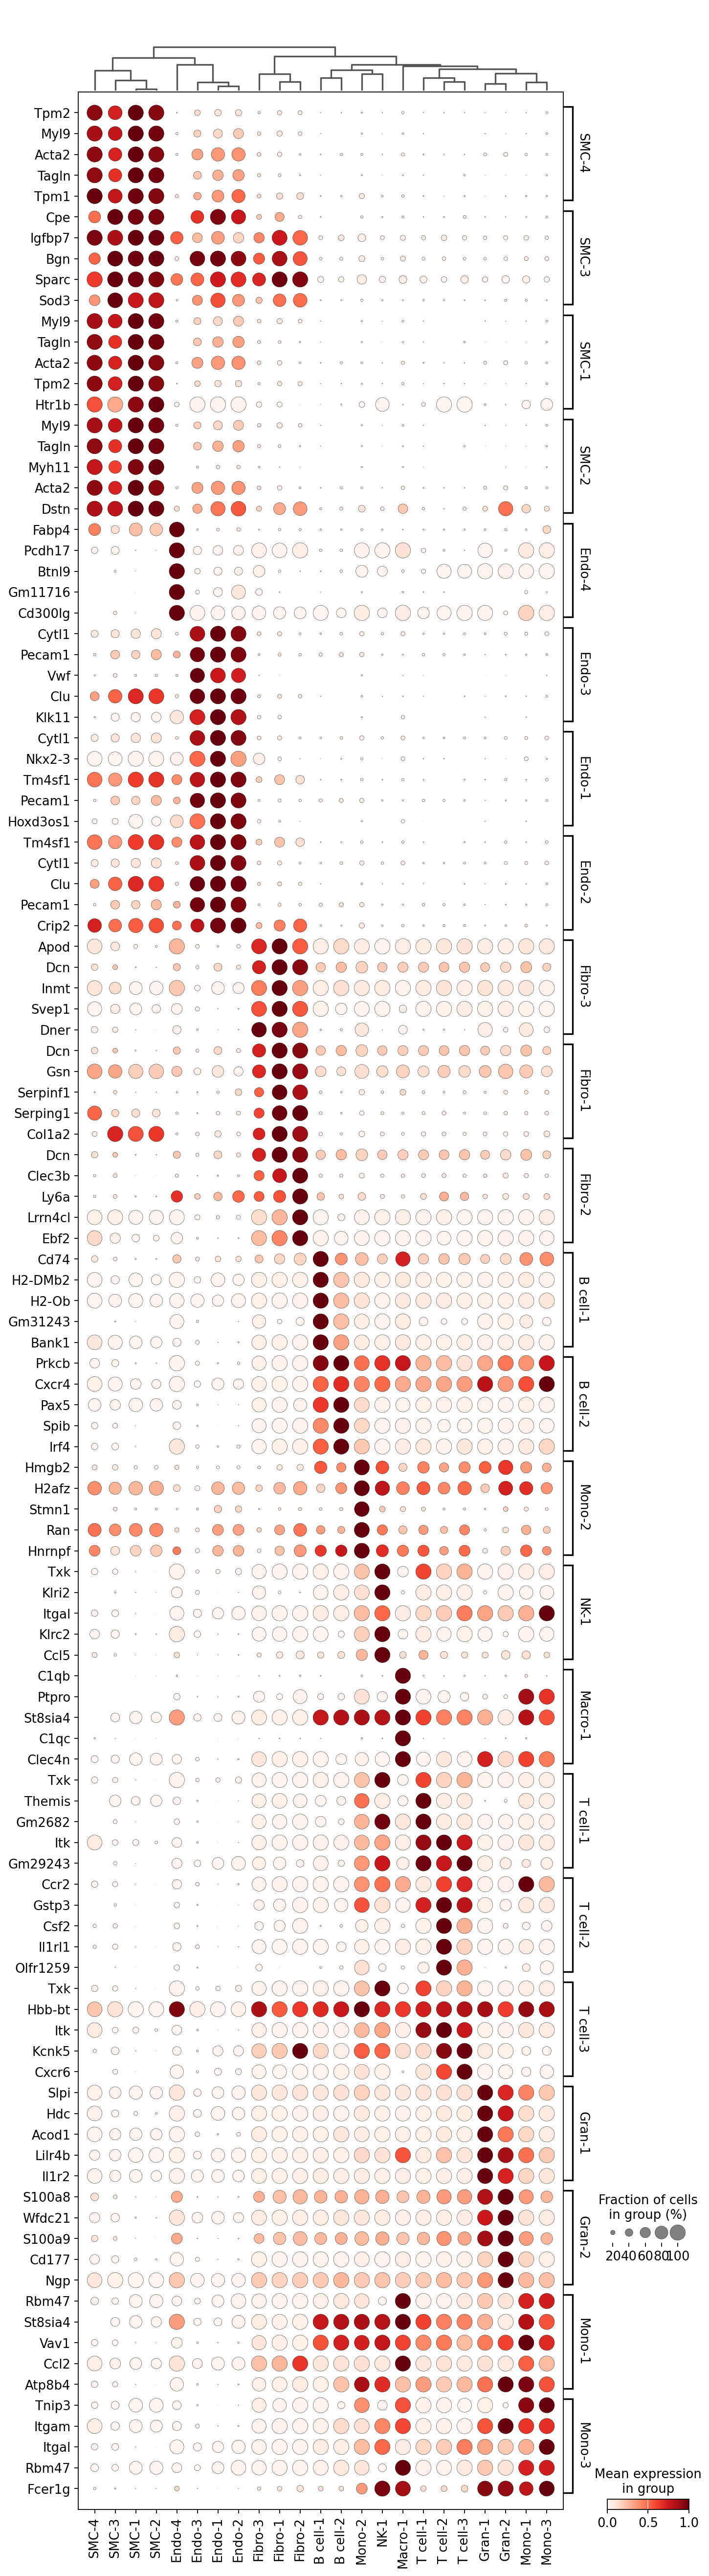

In [628]:
sc.pl.rank_genes_groups_dotplot(adata,key='DE_CTv1',n_genes=5,
                               swap_axes=True,standard_scale='var')

In [642]:
df = pd.DataFrame(adata.uns['DE_CTv1']['names'])

In [644]:
df.to_csv('Files/Deng_Markers.csv')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata, groupby='CTv1', key='DE_CTv1', cmap=cmap,n_genes=3,
                                #swap_axes=True, 
                                standard_scale='var',
              dendrogram=False,
             save='Deng_rank_markers_CTv1.pdf'
             )

In [ ]:
sc.pl.umap(adata0,color='CTv1',palette=palette_with_replicates,title='Cell type',
          save='_CTv1.png'
          )
sc.pl.umap(adata0,color='CTv1',palette=palette_with_replicates,title='Cell type',
          save='_CTv1.pdf'
          )

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


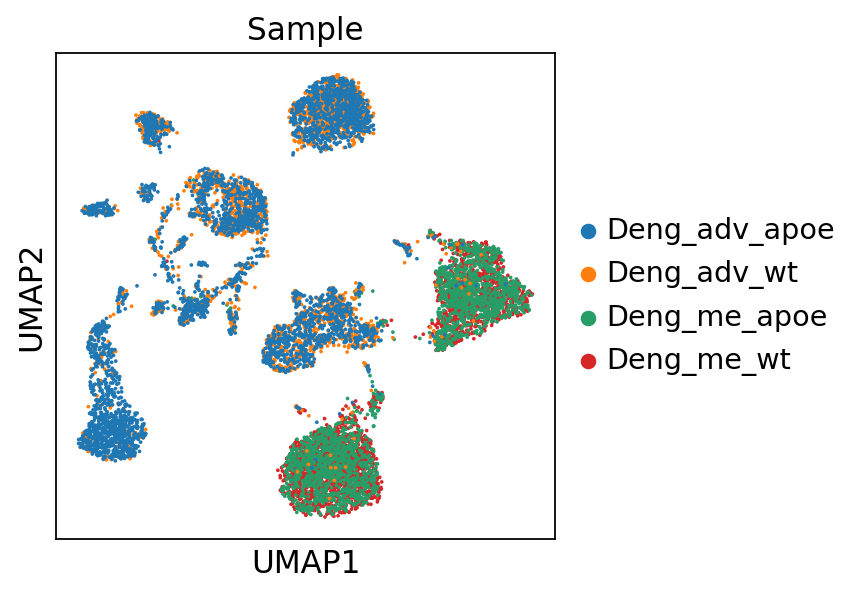

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


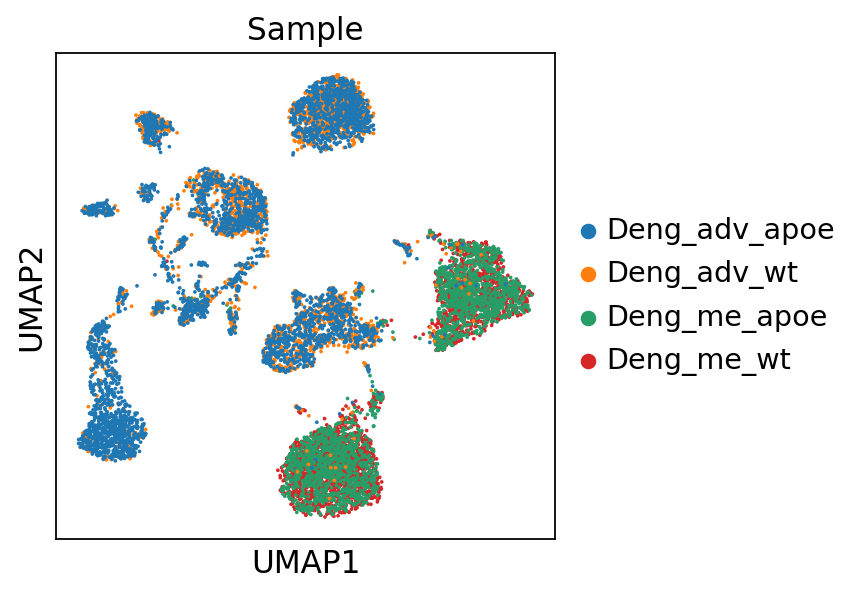

In [30]:
sc.pl.umap(adata,color='Sample',
           #palette=palette_with_replicates,
          save='_Sample.png'
          )
sc.pl.umap(adata,color='Sample',
           #palette=palette_with_replicates,
          save='_Sample.pdf'
          )

In [57]:
len(GL)

40

In [95]:
GL1 = GL[0:12]
GL2 = GL[12:24]
GL3 = GL[24:36]
GL4 = GL[36:40]
GLlist = [GL1,GL2,GL3,GL4]

In [101]:
GLlist[3]

['Myh11', 'Tagln', 'Clu', 'Actc1']

In [16]:
adata = sc.read('./write/Deng_outer_processed.h5ad')

# Pathway analysis

Database : GOBP M5

In [ ]:
import smqpp
with open('/cluster/groups/Wangxiaonan/share/Files/m5.go.v2022.1.Mm.symbols.gmt') as f:
    DBcont2 = f.readlines()

group='Apoe'
gp_name = 'Apoe_v_WT' if group=='Apoe' else 'WT_v_Apoe'
toplot = 'CT_rough'

cats = cat_CTv1 if toplot=='CTv1' else cat_CT_rough
for ct in ['Endo']:
    adataSub = adata[adata.obs[toplot]==ct]
    scoreBiomarker = smqpp.pathway_score_cal(adataSub, DBcont2)
    scoreBiomarker = anndata.AnnData(scoreBiomarker, obs=adataSub.obs, var=pd.DataFrame(scoreBiomarker.columns, index=scoreBiomarker.columns), obsm=adataSub.obsm)
    sc.tl.rank_genes_groups(scoreBiomarker, 'Geno', n_genes=scoreBiomarker.shape[1], key_added='DE_Geno')
    
    scoreBiomarker.var.drop(columns=0,inplace=True)
    scoreBiomarker.write(f'./write/{ct}_comp.BM.h5ad')
    
    scoreBiomarker = sc.read(f'./write/{ct}_comp.BM.h5ad')
    
    tocheck = scoreBiomarker.uns['DE_Geno']['names'][group][0:10]
    add_len = max([len(x) for x in tocheck])

    fig,ax=plt.subplots(figsize=(3,2.5),layout='constrained')
    sc.pl.stacked_violin(scoreBiomarker,var_names=GL,show=False,swap_axes=True,cmap=cmap,
                         title=ct,
                         groupby=['Geno'],
                         standard_scale='var',colorbar_title='Median exp\nin group',
                         vmin=0,vcenter=0.5,vmax=1,
                         ax=ax
                        )
    ax.set_title(ct)
    ax.set_ylabel('')
    ax.set_xlabel('')
    plt.savefig(f'./figures/stacked_violin_BM_{ct}_{gp_name}.pdf',bbox_inches='tight')
